Cited from Gin04kg's Deep Reinforcement Learning on Stock Data and DQN method from Stable Baseline3
Automated Stock action considering history stock price as discrete data

In [1]:
from StockTrade import StockTradeDiscrete
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.dqn import MlpPolicy
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from StockTrade import StockTrade
import os
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3 import HER, DDPG, DQN, SAC, TD3
from stable_baselines3.her.goal_selection_strategy import GoalSelectionStrategy
from stable_baselines3.common.bit_flipping_env import BitFlippingEnv
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env.obs_dict_wrapper import ObsDictWrapper

Using Callback function to save Best Training Reward

In [2]:
# cited from stable baseline 3
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

Create 'tmp' file to save best Model locally

In [3]:
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

In [4]:
env_raw = StockTradeDiscrete()
env = Monitor(env_raw, log_dir)

Using DQN to invoke MlpPolicy to start training and get feedback results. The results will be shown up on Stock Trade Game graph

Using cpu device
Wrapping the env in a DummyVecEnv.
Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -141.50
Saving new best model to tmp/best_model
Num timesteps: 2000
Best mean reward: -141.50 - Last mean reward per episode: -131.00
Saving new best model to tmp/best_model
Num timesteps: 3000
Best mean reward: -131.00 - Last mean reward per episode: -127.17
Saving new best model to tmp/best_model
Num timesteps: 4000
Best mean reward: -127.17 - Last mean reward per episode: -129.62
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -130     |
|    exploration rate | 0.873    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 13285    |
|    time_elapsed     | 0        |
|    total timesteps  | 4000     |
----------------------------------
Num timesteps: 5000
Best mean reward: -127.17 - Last mean reward per episode: -124.60
Saving new best 

Num timesteps: 45000
Best mean reward: -121.56 - Last mean reward per episode: -121.86
Num timesteps: 46000
Best mean reward: -121.56 - Last mean reward per episode: -121.78
Num timesteps: 47000
Best mean reward: -121.56 - Last mean reward per episode: -121.86
Num timesteps: 48000
Best mean reward: -121.56 - Last mean reward per episode: -122.51
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -123     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 13748    |
|    time_elapsed     | 3        |
|    total timesteps  | 48000    |
----------------------------------
Num timesteps: 49000
Best mean reward: -121.56 - Last mean reward per episode: -122.49
Num timesteps: 50000
Best mean reward: -121.56 - Last mean reward per episode: -122.60
Num timesteps: 51000
Best mean reward: -121.56 - Last mean reward per episode: -121.07
Saving

Num timesteps: 80000
Best mean reward: -76.42 - Last mean reward per episode: -75.40
Saving new best model to tmp/best_model
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -75.4    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 2719     |
|    time_elapsed     | 29       |
|    total timesteps  | 80000    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.229    |
|    n_updates        | 7499     |
----------------------------------
Num timesteps: 81000
Best mean reward: -75.40 - Last mean reward per episode: -74.37
Saving new best model to tmp/best_model
Num timesteps: 82000
Best mean reward: -74.37 - Last mean reward per episode: -73.37
Saving new best model to tmp/best_model
Num timesteps: 83000
Best mean reward: -73.37 - Last mean reward per episode: -72.46
Saving new best

Num timesteps: 112000
Best mean reward: -45.70 - Last mean reward per episode: -44.05
Saving new best model to tmp/best_model
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -44      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 1982     |
|    time_elapsed     | 56       |
|    total timesteps  | 112000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.111    |
|    n_updates        | 15499    |
----------------------------------
Num timesteps: 113000
Best mean reward: -44.05 - Last mean reward per episode: -42.96
Saving new best model to tmp/best_model
Num timesteps: 114000
Best mean reward: -42.96 - Last mean reward per episode: -41.61
Saving new best model to tmp/best_model
Num timesteps: 115000
Best mean reward: -41.61 - Last mean reward per episode: -40.12
Saving new 

Num timesteps: 144000
Best mean reward: -5.21 - Last mean reward per episode: -4.37
Saving new best model to tmp/best_model
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -4.37    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 1719     |
|    time_elapsed     | 83       |
|    total timesteps  | 144000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0591   |
|    n_updates        | 23499    |
----------------------------------
Num timesteps: 145000
Best mean reward: -4.37 - Last mean reward per episode: -3.41
Saving new best model to tmp/best_model
Num timesteps: 146000
Best mean reward: -3.41 - Last mean reward per episode: -2.21
Saving new best model to tmp/best_model
Num timesteps: 147000
Best mean reward: -2.21 - Last mean reward per episode: -0.90
Saving new best mod

Num timesteps: 181000
Best mean reward: 3.83 - Last mean reward per episode: 2.75
Num timesteps: 182000
Best mean reward: 3.83 - Last mean reward per episode: 2.67
Num timesteps: 183000
Best mean reward: 3.83 - Last mean reward per episode: 2.66
Num timesteps: 184000
Best mean reward: 3.83 - Last mean reward per episode: 2.59
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | 2.59     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 1564     |
|    time_elapsed     | 117      |
|    total timesteps  | 184000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0651   |
|    n_updates        | 33499    |
----------------------------------
Num timesteps: 185000
Best mean reward: 3.83 - Last mean reward per episode: 2.59
Num timesteps: 186000
Best mean reward: 3.83 - Last mean reward p

Num timesteps: 221000
Best mean reward: 3.83 - Last mean reward per episode: 3.04
Num timesteps: 222000
Best mean reward: 3.83 - Last mean reward per episode: 2.94
Num timesteps: 223000
Best mean reward: 3.83 - Last mean reward per episode: 2.96
Num timesteps: 224000
Best mean reward: 3.83 - Last mean reward per episode: 2.88
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | 2.88     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1475     |
|    time_elapsed     | 151      |
|    total timesteps  | 224000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0409   |
|    n_updates        | 43499    |
----------------------------------
Num timesteps: 225000
Best mean reward: 3.83 - Last mean reward per episode: 2.90
Num timesteps: 226000
Best mean reward: 3.83 - Last mean reward p

Num timesteps: 261000
Best mean reward: 3.83 - Last mean reward per episode: 2.19
Num timesteps: 262000
Best mean reward: 3.83 - Last mean reward per episode: 2.33
Num timesteps: 263000
Best mean reward: 3.83 - Last mean reward per episode: 2.59
Num timesteps: 264000
Best mean reward: 3.83 - Last mean reward per episode: 2.64
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | 2.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 1417     |
|    time_elapsed     | 186      |
|    total timesteps  | 264000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0664   |
|    n_updates        | 53499    |
----------------------------------
Num timesteps: 265000
Best mean reward: 3.83 - Last mean reward per episode: 2.73
Num timesteps: 266000
Best mean reward: 3.83 - Last mean reward p

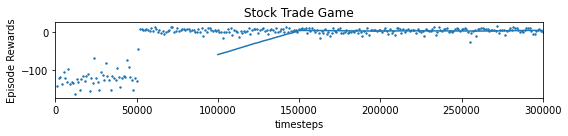

In [5]:
model = DQN(MlpPolicy, env, verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
timesteps = 300000

model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Stock Trade Game")
plt.show()
model.save("123Automator")

Visualization of training model to show its hold, profit and current stock price every day.

In [6]:
obs = env.reset()
done = False
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

#################################
day 2
current price: 13.118
hold: 0
profit got: 0
#################################
day 3
current price: 13.342
hold: 0
profit got: 0
#################################
day 4
current price: 13.568
hold: 0
profit got: 0
#################################
day 5
current price: 13.45
hold: 0
profit got: 0
#################################
day 6
current price: 13.549000000000001
hold: 0
profit got: 0
#################################
day 7
current price: 13.568
hold: 0
profit got: 0
#################################
day 8
current price: 13.47
hold: 0
profit got: 0
#################################
day 9
current price: 13.088
hold: 0
profit got: 0
#################################
day 10
current price: 12.95
hold: 0
profit got: 0
#################################
day 11
current price: 12.99
hold: 0
profit got: 0
#################################
day 12
current price: 12.95
hold: 0
profit got: 0
#################################
day 13
current price: 13.421
hol

#################################
day 107
current price: 15.794
hold: 44
profit got: 0
#################################
day 108
current price: 15.962
hold: 44
profit got: 0
#################################
day 109
current price: 16.042
hold: 44
profit got: 0
#################################
day 110
current price: 16.259
hold: 44
profit got: 0
#################################
day 111
current price: 16.12
hold: 44
profit got: 0
#################################
day 112
current price: 16.012
hold: 44
profit got: 0
#################################
day 113
current price: 15.568
hold: 44
profit got: 0
#################################
day 114
current price: 15.529000000000002
hold: 44
profit got: 0
#################################
day 115
current price: 15.665999999999999
hold: 44
profit got: 0
#################################
day 116
current price: 15.568
hold: 44
profit got: 0
#################################
day 117
current price: 15.626
hold: 44
profit got: 0
####################

profit got: 0
#################################
day 223
current price: 14.372
hold: 44
profit got: 0
#################################
day 224
current price: 14.265999999999998
hold: 44
profit got: 0
#################################
day 225
current price: 14.245999999999999
hold: 44
profit got: 0
#################################
day 226
current price: 14.296
hold: 44
profit got: 0
#################################
day 227
current price: 14.548
hold: 44
profit got: 0
#################################
day 228
current price: 14.922
hold: 44
profit got: 0
#################################
day 229
current price: 14.667
hold: 44
profit got: 0
#################################
day 230
current price: 14.745
hold: 44
profit got: 0
#################################
day 231
current price: 15.020999999999999
hold: 44
profit got: 0
#################################
day 232
current price: 15.030999999999999
hold: 44
profit got: 0
#################################
day 233
current price: 15.147
hold

#################################
day 342
current price: 16.747
hold: 44
profit got: 0
#################################
day 343
current price: 16.844
hold: 44
profit got: 0
#################################
day 344
current price: 16.785
hold: 44
profit got: 0
#################################
day 345
current price: 16.844
hold: 44
profit got: 0
#################################
day 346
current price: 16.452
hold: 44
profit got: 0
#################################
day 347
current price: 16.325
hold: 44
profit got: 0
#################################
day 348
current price: 16.061
hold: 44
profit got: 0
#################################
day 349
current price: 15.902999999999999
hold: 44
profit got: 0
#################################
day 350
current price: 16.101
hold: 44
profit got: 0
#################################
day 351
current price: 16.12
hold: 44
profit got: 0
#################################
day 352
current price: 16.53
hold: 44
profit got: 0
#################################

#################################
day 460
current price: 18.022000000000002
hold: 46
profit got: 0
#################################
day 461
current price: 17.934
hold: 46
profit got: 0
#################################
day 462
current price: 17.738
hold: 46
profit got: 0
#################################
day 463
current price: 17.895
hold: 46
profit got: 0
#################################
day 464
current price: 18.414
hold: 46
profit got: 0
#################################
day 465
current price: 18.611
hold: 46
profit got: 0
#################################
day 466
current price: 18.671
hold: 46
profit got: 0
#################################
day 467
current price: 18.219
hold: 46
profit got: 0
#################################
day 468
current price: 18.354
hold: 46
profit got: 0
#################################
day 469
current price: 18.354
hold: 46
profit got: 0
#################################
day 470
current price: 18.238
hold: 46
profit got: 0
###############################

profit got: 0
#################################
day 578
current price: 18.277
hold: 46
profit got: 0
#################################
day 579
current price: 18.492
hold: 46
profit got: 0
#################################
day 580
current price: 19.500999999999998
hold: 46
profit got: 0
#################################
day 581
current price: 19.083
hold: 46
profit got: 0
#################################
day 582
current price: 18.983
hold: 46
profit got: 0
#################################
day 583
current price: 18.875
hold: 46
profit got: 0
#################################
day 584
current price: 18.532
hold: 46
profit got: 0
#################################
day 585
current price: 18.13
hold: 46
profit got: 0
#################################
day 586
current price: 18.238
hold: 46
profit got: 0
#################################
day 587
current price: 18.394000000000002
hold: 46
profit got: 0
#################################
day 588
current price: 18.297
hold: 46
profit got: 0
######

profit got: 0
#################################
day 696
current price: 12.607000000000001
hold: 46
profit got: 0
#################################
day 697
current price: 12.94
hold: 46
profit got: 0
#################################
day 698
current price: 12.547
hold: 46
profit got: 0
#################################
day 699
current price: 12.527000000000001
hold: 46
profit got: 0
#################################
day 700
current price: 12.527000000000001
hold: 46
profit got: 0
#################################
day 701
current price: 12.607000000000001
hold: 46
profit got: 0
#################################
day 702
current price: 12.821
hold: 46
profit got: 0
#################################
day 703
current price: 12.831
hold: 46
profit got: 0
#################################
day 704
current price: 12.362
hold: 46
profit got: 0
#################################
day 705
current price: 12.263
hold: 46
profit got: 0
#################################
day 706
current price: 12.232999999

current price: 15.099
hold: 55
profit got: 0
#################################
day 815
current price: 14.883
hold: 55
profit got: 0
#################################
day 816
current price: 15.050999999999998
hold: 55
profit got: 0
#################################
day 817
current price: 14.637
hold: 55
profit got: 0
#################################
day 818
current price: 14.588
hold: 55
profit got: 0
#################################
day 819
current price: 14.617
hold: 55
profit got: 0
#################################
day 820
current price: 14.647
hold: 55
profit got: 0
#################################
day 821
current price: 14.588
hold: 55
profit got: 0
#################################
day 822
current price: 14.315
hold: 55
profit got: 0
#################################
day 823
current price: 14.508
hold: 55
profit got: 0
#################################
day 824
current price: 14.823
hold: 55
profit got: 0
#################################
day 825
current price: 15.138
hold: 55


hold: 61
profit got: 0
#################################
day 932
current price: 14.793
hold: 61
profit got: 0
#################################
day 933
current price: 14.568
hold: 61
profit got: 0
#################################
day 934
current price: 14.982000000000001
hold: 61
profit got: 0
#################################
day 935
current price: 14.677
hold: 61
profit got: 0
#################################
day 936
current price: 14.196
hold: 61
profit got: 0
#################################
day 937
current price: 14.008
hold: 61
profit got: 0
#################################
day 938
current price: 13.734000000000002
hold: 61
profit got: 0
#################################
day 939
current price: 14.823
hold: 61
profit got: 0
#################################
day 940
current price: 14.627
hold: 61
profit got: 0
#################################
day 941
current price: 14.255999999999998
hold: 61
profit got: 0
#################################
day 942
current price: 14.372
hold: 6

## References
Gin04kg's Deep Reinforcement Learning on Stock Data, from 
https://www.kaggle.com/itoeiji/deep-reinforcement-learning-on-stock-data/notebook
Stable Baseline3, from
https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html

MIT License

Copyright (c) 2020 Shihao Sun, Jianwei Hu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.